,points
mean_points,1.88
sd_points,4.17
min_points,0.00
max_points,50.00
count_obs,25840.00


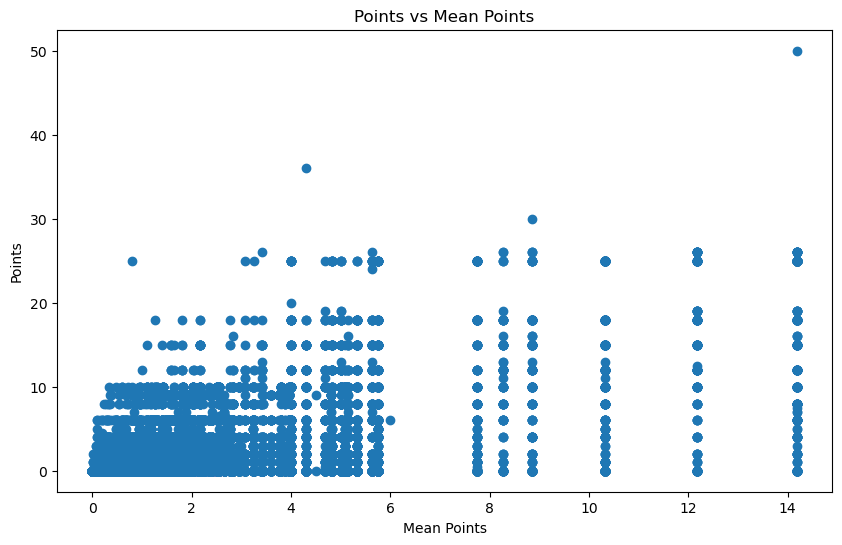

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv("/Users/allenhung/Documents/GitHub/qtm151/assignments/07-assignment/data_raw/results.csv")

len(results)

results.resultId.nunique()

results.driverId.nunique()

results_agg = results.agg(mean_points = ('points','mean'),
                          sd_points =   ('points','std'),
                          min_points =  ('points','min'),
                          max_points =  ('points','max'),
                          count_obs   = ('points', len))

display(results_agg.round(2))

team_agg = (results.groupby("constructorId")
                   .agg(mean_points = ('points','mean')))

team_agg.sort_values("mean_points", ascending = False).round(2)

drivers_agg = (results.groupby("driverId")
                      .agg(mean_points = ('points','mean'),
                           sd_points =   ('points','std'),
                           min_points =  ('points','min'),
                           max_points =  ('points','max'),
                           count_obs   = ('points',len)))


results_merge = pd.merge(results,
                         drivers_agg,
                         on = "driverId",
                         how = "left")

plt.figure(figsize=(10,6))
plt.scatter(results_merge["mean_points"], results_merge["points"])
plt.xlabel("Mean Points")
plt.ylabel("Points")
plt.title("Points vs Mean Points")
plt.show()
